## ETL and Tab
** Take CSV and ETL

* OBDA
* Slip on
* Pump status
* TDS status
* Pipe Direction

Step 1 - load csv and perform ETL

Step 2 - add states derived from existing data

Step 3 - Loop through and assign drilling state?

#### load csv as df

Step 1 : Load CSV and perform ETL

In [8]:
import pandas as pd
import numpy as np
from pathlib import Path
import os

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.widgets import Cursor
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.widgets import Cursor
import datetime as dt
from scipy import stats


from mpl_toolkits.mplot3d import Axes3D

In [119]:
filepath = Path(R"C:\Users\fmazl\Documents\ibm\volve\test\f15\csv\f15b - 17.5 in\1.csv")

#previous test
#(R"C:\Users\fmazl\Documents\ibm\volve\test\f15\csv\3\1.csv")
#(R"C:\Users\fmazl\Documents\ibm\volve\test\others\TE-83.csv")
#os.path(filepath)
df_depth = pd.read_csv(filepath)
df_depth

,TIME - s,GS_DMEA - m,GS_DBTM - m,ROP5 -,GS_BPOS - m,GS_HKLD - t,GS_SWOB - t,GS_TFLO - L/min,GS_SPPA - kPa,GS_RPM - rpm
0,2008-12-08 13:47:20.026000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-12-08 18:20:33.043000+00:00,4090.350098,1237.989990,NaN,12.66,102.461089,0.0,240.600007,217.000006,0.0
2,2008-12-08 18:20:37.968000+00:00,4090.350098,1237.989990,NaN,12.66,102.175561,0.0,430.390015,244.000007,0.0
3,2008-12-08 18:20:47.040000+00:00,4090.350098,1237.989990,NaN,12.66,102.552859,0.0,748.090025,197.000005,0.0
4,2008-12-08 18:20:51.014000+00:00,4090.350098,1237.989990,NaN,12.66,102.359111,0.0,907.460023,343.000007,0.0
...,...,...,...,...,...,...,...,...,...,...
360876,2008-12-18 21:33:23.040000+00:00,2591.060059,1535.459961,NaN,16.81,179.286512,0.0,776.530030,1228.999995,0.0
360877,2008-12-18 21:33:27.014000+00:00,2591.060059,1535.459961,NaN,16.81,179.215124,0.0,776.530030,1243.000028,0.0
360878,2008-12-18 21:33:32.026000+00:00,2591.060059,1535.459961,NaN,16.81,178.939797,0.0,776.530030,1244.999983,0.0
360879,2008-12-18 21:33:36+00:00,2591.060059,1535.459961,NaN,16.81,178.858217,0.0,776.530030,1268.000031,0.0


In [120]:
#convert dtype
#df_depth['TIME - s'] = pd.to_datetime(df_depth['TIME - s'])
df_depth.iloc[:,1:9] = df_depth.iloc[:,1:9].astype(float, errors='raise')

df_depth.dtypes
#df_depth

TIME - s            object
GS_DMEA - m        float64
GS_DBTM - m        float64
ROP5 -             float64
GS_BPOS - m        float64
GS_HKLD - t        float64
GS_SWOB - t        float64
GS_TFLO - L/min    float64
GS_SPPA - kPa      float64
GS_RPM - rpm       float64
dtype: object

In [121]:


df_depth = df_depth.fillna(method='ffill', limit=3)
df_depth



,TIME - s,GS_DMEA - m,GS_DBTM - m,ROP5 -,GS_BPOS - m,GS_HKLD - t,GS_SWOB - t,GS_TFLO - L/min,GS_SPPA - kPa,GS_RPM - rpm
0,2008-12-08 13:47:20.026000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-12-08 18:20:33.043000+00:00,4090.350098,1237.989990,NaN,12.66,102.461089,0.0,240.600007,217.000006,0.0
2,2008-12-08 18:20:37.968000+00:00,4090.350098,1237.989990,NaN,12.66,102.175561,0.0,430.390015,244.000007,0.0
3,2008-12-08 18:20:47.040000+00:00,4090.350098,1237.989990,NaN,12.66,102.552859,0.0,748.090025,197.000005,0.0
4,2008-12-08 18:20:51.014000+00:00,4090.350098,1237.989990,NaN,12.66,102.359111,0.0,907.460023,343.000007,0.0
...,...,...,...,...,...,...,...,...,...,...
360876,2008-12-18 21:33:23.040000+00:00,2591.060059,1535.459961,NaN,16.81,179.286512,0.0,776.530030,1228.999995,0.0
360877,2008-12-18 21:33:27.014000+00:00,2591.060059,1535.459961,NaN,16.81,179.215124,0.0,776.530030,1243.000028,0.0
360878,2008-12-18 21:33:32.026000+00:00,2591.060059,1535.459961,NaN,16.81,178.939797,0.0,776.530030,1244.999983,0.0
360879,2008-12-18 21:33:36+00:00,2591.060059,1535.459961,NaN,16.81,178.858217,0.0,776.530030,1268.000031,0.0


In [122]:
#set negative values to 0
num = df_depth._get_numeric_data()
num[num<0] = 0
df_depth



,TIME - s,GS_DMEA - m,GS_DBTM - m,ROP5 -,GS_BPOS - m,GS_HKLD - t,GS_SWOB - t,GS_TFLO - L/min,GS_SPPA - kPa,GS_RPM - rpm
0,2008-12-08 13:47:20.026000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-12-08 18:20:33.043000+00:00,4090.350098,1237.989990,NaN,12.66,102.461089,0.0,240.600007,217.000006,0.0
2,2008-12-08 18:20:37.968000+00:00,4090.350098,1237.989990,NaN,12.66,102.175561,0.0,430.390015,244.000007,0.0
3,2008-12-08 18:20:47.040000+00:00,4090.350098,1237.989990,NaN,12.66,102.552859,0.0,748.090025,197.000005,0.0
4,2008-12-08 18:20:51.014000+00:00,4090.350098,1237.989990,NaN,12.66,102.359111,0.0,907.460023,343.000007,0.0
...,...,...,...,...,...,...,...,...,...,...
360876,2008-12-18 21:33:23.040000+00:00,2591.060059,1535.459961,NaN,16.81,179.286512,0.0,776.530030,1228.999995,0.0
360877,2008-12-18 21:33:27.014000+00:00,2591.060059,1535.459961,NaN,16.81,179.215124,0.0,776.530030,1243.000028,0.0
360878,2008-12-18 21:33:32.026000+00:00,2591.060059,1535.459961,NaN,16.81,178.939797,0.0,776.530030,1244.999983,0.0
360879,2008-12-18 21:33:36+00:00,2591.060059,1535.459961,NaN,16.81,178.858217,0.0,776.530030,1268.000031,0.0


Step 2 : add states derived from existing data

In [123]:
#define block weight
block_weight = 80


#On bottom status
df_depth['OBDA'] = np.where(df_depth['GS_SWOB - t']>0,1,0)
#slips status
df_depth['Slips'] = np.where(df_depth['GS_HKLD - t']<block_weight,1,0)
#pump status
df_depth['Pump Status'] = np.where(df_depth['GS_TFLO - L/min']>0,1,0)
#TDS status
df_depth['TDS Status'] = np.where(df_depth['GS_RPM - rpm']>0,1,0)
#pipe direction
x = df_depth['GS_BPOS - m'].rolling(window=30).mean()
x = x.diff(periods=1)
#x = x.rolling(window=5).mean()
df_depth['Pipe Direction'] = np.where(x>0.2,2,1)
df_depth['Pipe Direction'] = np.where(x<-0.01,0,df_depth['Pipe Direction'])


#combi states
df_depth['state'] = df_depth['OBDA'].map(str) + df_depth['Slips'].map(str) + df_depth['Pump Status'].map(str) + df_depth['TDS Status'].map(str) +df_depth['Pipe Direction'].map(str)

#df_depth['Pipe Direction'] = df_depth['Pipe Direction'].rolling(window=3).mean()
#df_depth['Pipe Direction']=np.where(df_depth['BPOS - m'].diff(periods=5)>0.1,2,1)
#df_depth['Pipe Direction']=np.where(df_depth['BPOS - m'].diff(periods=5)<-0.01,0,df_depth['Pipe Direction'])


In [124]:
#convert dtype
df_depth['TIME - s'] = pd.to_datetime(df_depth['TIME - s'], dayfirst=True)
df_depth.iloc[:,1:9] = df_depth.iloc[:,1:9].astype(float, errors='raise')
df_depth.dtypes

TIME - s           datetime64[ns, UTC]
GS_DMEA - m                    float64
GS_DBTM - m                    float64
ROP5 -                         float64
GS_BPOS - m                    float64
GS_HKLD - t                    float64
GS_SWOB - t                    float64
GS_TFLO - L/min                float64
GS_SPPA - kPa                  float64
GS_RPM - rpm                   float64
OBDA                             int32
Slips                            int32
Pump Status                      int32
TDS Status                       int32
Pipe Direction                   int32
state                           object
dtype: object

In [125]:
df_depth

,TIME - s,GS_DMEA - m,GS_DBTM - m,ROP5 -,GS_BPOS - m,GS_HKLD - t,GS_SWOB - t,GS_TFLO - L/min,GS_SPPA - kPa,GS_RPM - rpm,OBDA,Slips,Pump Status,TDS Status,Pipe Direction,state
0,2008-12-08 13:47:20.026000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,00001
1,2008-12-08 18:20:33.043000+00:00,4090.350098,1237.989990,NaN,12.66,102.461089,0.0,240.600007,217.000006,0.0,0,0,1,0,1,00101
2,2008-12-08 18:20:37.968000+00:00,4090.350098,1237.989990,NaN,12.66,102.175561,0.0,430.390015,244.000007,0.0,0,0,1,0,1,00101
3,2008-12-08 18:20:47.040000+00:00,4090.350098,1237.989990,NaN,12.66,102.552859,0.0,748.090025,197.000005,0.0,0,0,1,0,1,00101
4,2008-12-08 18:20:51.014000+00:00,4090.350098,1237.989990,NaN,12.66,102.359111,0.0,907.460023,343.000007,0.0,0,0,1,0,1,00101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360876,2008-12-18 21:33:23.040000+00:00,2591.060059,1535.459961,NaN,16.81,179.286512,0.0,776.530030,1228.999995,0.0,0,0,1,0,1,00101
360877,2008-12-18 21:33:27.014000+00:00,2591.060059,1535.459961,NaN,16.81,179.215124,0.0,776.530030,1243.000028,0.0,0,0,1,0,1,00101
360878,2008-12-18 21:33:32.026000+00:00,2591.060059,1535.459961,NaN,16.81,178.939797,0.0,776.530030,1244.999983,0.0,0,0,1,0,1,00101
360879,2008-12-18 21:33:36+00:00,2591.060059,1535.459961,NaN,16.81,178.858217,0.0,776.530030,1268.000031,0.0,0,0,1,0,1,00101


below lines to tag colors and states

In [133]:
#state_colors. use to for graph 3 plot. check here to confirm state tag is correct

state_color = {'01000':{'operation':'in slips','color':'dimgray'}, 
                '01001':{'operation':'in slips','color':'dimgray'},
                '01002':{'operation':'in slips','color':'dimgray'},
                '01100':{'operation':'in slips','color':'lightgray'},
                '01101':{'operation':'in slips','color':'lightgray'},
                '01102':{'operation':'in slips','color':'lightgray'},
                '01010':{'operation':'in slips','color':'darkgray'},
                '01011':{'operation':'in slips','color':'darkgray'},
                '01012':{'operation':'in slips','color':'darkgray'},
                '01110':{'operation':'in slips','color':'lightgray'},
                '01111':{'operation':'in slips','color':'lightgray'},
                '01112':{'operation':'in slips','color':'lightgray'},

                '10000':{'operation':'Run in hole','color':'lightsteelblue'},
                '10001':{'operation':'Static','color':'lightsteelblue'},
                '10002':{'operation':'Pull out of hole','color':'lightsteelblue'},

                '10010':{'operation':'Run in only rotating','color':'darkblue'},
                '10011':{'operation':'Rotating only','color':'darkblue'},
                '10110':{'operation':'Rotary Drilling','color':'darkblue'},
                '10100':{'operation':'Sliding Drilling','color':'blue'},
                '10101':{'operation':'Circulate hole','color':'lightsteelblue'},
                '10102':{'operation':'Wash Upwards','color':'lightsteelblue'},
                '10111':{'operation':'Rotary Drilling','color':'darkblue'},
                '10112':{'operation':'Ream upwards','color':'lightsteelblue'},
                '11001':{'operation':'in slips','color':'lightsteelblue'},
                '11100':{'operation':'in slips','color':'lightsteelblue'},
                '11101':{'operation':'in slips','color':'lightsteelblue'},
                '00110':{'operation':'Ream downwards','color':'lime'},
                '00112':{'operation':'Ream upwards','color':'darkgreen'},
                '00100':{'operation':'Circulate hole','color':'orange'},
                '00101':{'operation':'Wash Downwards','color':'slategray'},
                '00102':{'operation':'Wash Upwards','color':'yellow'},
                '00111':{'operation':'Circulate while rotating','color':'violet'},
                '00010':{'operation':'Run in only rotating','color':'lightslategray'},
                '00012':{'operation':'Pull out only rotating','color':'darkblue'},
                '00000':{'operation':'Run in hole','color':'blue'},
                '00002':{'operation':'Pull out of hole','color':'lime'},
                '00011':{'operation':'Rotating only','color':'darkgreen'},
                '00001':{'operation':'Static','color':'orange'}
}
                
state_color

{'01000': {'operation': 'in slips', 'color': 'dimgray'},
 '01001': {'operation': 'in slips', 'color': 'dimgray'},
 '01002': {'operation': 'in slips', 'color': 'dimgray'},
 '01100': {'operation': 'in slips', 'color': 'lightgray'},
 '01101': {'operation': 'in slips', 'color': 'lightgray'},
 '01102': {'operation': 'in slips', 'color': 'lightgray'},
 '01010': {'operation': 'in slips', 'color': 'darkgray'},
 '01011': {'operation': 'in slips', 'color': 'darkgray'},
 '01012': {'operation': 'in slips', 'color': 'darkgray'},
 '01110': {'operation': 'in slips', 'color': 'lightgray'},
 '01111': {'operation': 'in slips', 'color': 'lightgray'},
 '01112': {'operation': 'in slips', 'color': 'lightgray'},
 '10000': {'operation': 'Run in hole', 'color': 'lightsteelblue'},
 '10001': {'operation': 'Static', 'color': 'lightsteelblue'},
 '10002': {'operation': 'Pull out of hole', 'color': 'lightsteelblue'},
 '10010': {'operation': 'Run in only rotating', 'color': 'darkblue'},
 '10011': {'operation': 'Rotat

In [127]:
df_depth

,TIME - s,GS_DMEA - m,GS_DBTM - m,ROP5 -,GS_BPOS - m,GS_HKLD - t,GS_SWOB - t,GS_TFLO - L/min,GS_SPPA - kPa,GS_RPM - rpm,OBDA,Slips,Pump Status,TDS Status,Pipe Direction,state
0,2008-12-08 13:47:20.026000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,00001
1,2008-12-08 18:20:33.043000+00:00,4090.350098,1237.989990,NaN,12.66,102.461089,0.0,240.600007,217.000006,0.0,0,0,1,0,1,00101
2,2008-12-08 18:20:37.968000+00:00,4090.350098,1237.989990,NaN,12.66,102.175561,0.0,430.390015,244.000007,0.0,0,0,1,0,1,00101
3,2008-12-08 18:20:47.040000+00:00,4090.350098,1237.989990,NaN,12.66,102.552859,0.0,748.090025,197.000005,0.0,0,0,1,0,1,00101
4,2008-12-08 18:20:51.014000+00:00,4090.350098,1237.989990,NaN,12.66,102.359111,0.0,907.460023,343.000007,0.0,0,0,1,0,1,00101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360876,2008-12-18 21:33:23.040000+00:00,2591.060059,1535.459961,NaN,16.81,179.286512,0.0,776.530030,1228.999995,0.0,0,0,1,0,1,00101
360877,2008-12-18 21:33:27.014000+00:00,2591.060059,1535.459961,NaN,16.81,179.215124,0.0,776.530030,1243.000028,0.0,0,0,1,0,1,00101
360878,2008-12-18 21:33:32.026000+00:00,2591.060059,1535.459961,NaN,16.81,178.939797,0.0,776.530030,1244.999983,0.0,0,0,1,0,1,00101
360879,2008-12-18 21:33:36+00:00,2591.060059,1535.459961,NaN,16.81,178.858217,0.0,776.530030,1268.000031,0.0,0,0,1,0,1,00101


Tag data lines with conditions for drilling state

In [134]:
operation =[]
condition = []
for key in state_color.keys():
        operation.append(state_color[key]['operation'])
        condition.append(df_depth['state']==key)
        
        #if df_depth['state'] == key:
        #        df_depth['state_class'] == operation
        #axs[2].fill_between(df_depth2['TIME - s'], 1, 0, where=(df_depth2['state']==key),
         #                facecolor=color)
        #df_depth['state_class'] = np.select(df_condition_temp['condition'].tolist(),operation, default = 'blank')
        
df_depth['state_class'] = np.select(condition,operation, default = 'blank')


In [129]:
df_depth

,TIME - s,GS_DMEA - m,GS_DBTM - m,ROP5 -,GS_BPOS - m,GS_HKLD - t,GS_SWOB - t,GS_TFLO - L/min,GS_SPPA - kPa,GS_RPM - rpm,OBDA,Slips,Pump Status,TDS Status,Pipe Direction,state,state_class
0,2008-12-08 13:47:20.026000+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,1,00001,Static
1,2008-12-08 18:20:33.043000+00:00,4090.350098,1237.989990,NaN,12.66,102.461089,0.0,240.600007,217.000006,0.0,0,0,1,0,1,00101,Wash Downwards
2,2008-12-08 18:20:37.968000+00:00,4090.350098,1237.989990,NaN,12.66,102.175561,0.0,430.390015,244.000007,0.0,0,0,1,0,1,00101,Wash Downwards
3,2008-12-08 18:20:47.040000+00:00,4090.350098,1237.989990,NaN,12.66,102.552859,0.0,748.090025,197.000005,0.0,0,0,1,0,1,00101,Wash Downwards
4,2008-12-08 18:20:51.014000+00:00,4090.350098,1237.989990,NaN,12.66,102.359111,0.0,907.460023,343.000007,0.0,0,0,1,0,1,00101,Wash Downwards
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360876,2008-12-18 21:33:23.040000+00:00,2591.060059,1535.459961,NaN,16.81,179.286512,0.0,776.530030,1228.999995,0.0,0,0,1,0,1,00101,Wash Downwards
360877,2008-12-18 21:33:27.014000+00:00,2591.060059,1535.459961,NaN,16.81,179.215124,0.0,776.530030,1243.000028,0.0,0,0,1,0,1,00101,Wash Downwards
360878,2008-12-18 21:33:32.026000+00:00,2591.060059,1535.459961,NaN,16.81,178.939797,0.0,776.530030,1244.999983,0.0,0,0,1,0,1,00101,Wash Downwards
360879,2008-12-18 21:33:36+00:00,2591.060059,1535.459961,NaN,16.81,178.858217,0.0,776.530030,1268.000031,0.0,0,0,1,0,1,00101,Wash Downwards


In [24]:
list(df_depth.columns)

['TIME - s',
 'GS_DMEA - m',
 'GS_DBTM - m',
 'ROP5 - ',
 'GS_BPOS - m',
 'GS_HKLD - t',
 'GS_SWOB - t',
 'GS_TFLO - L/min',
 'GS_SPPA - kPa',
 'GS_RPM - rpm',
 'OBDA',
 'Slips',
 'Pump Status',
 'TDS Status',
 'Pipe Direction',
 'state',
 'state_class']

test graph with four status


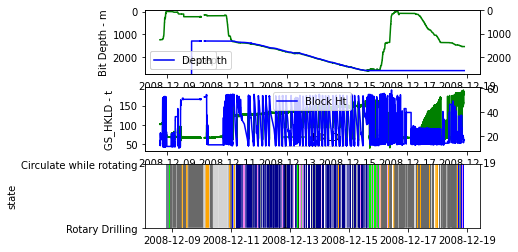

In [135]:
#note on header
#df[['TIME - s','DMEA - m','DBTM - m','ROP5 - ', 'BPOS - m','HKLD - kkgf','TFLO - L/min','SPPA - kPa','RPM - rpm']]
fig, axs = plt.subplots(3)
#x1= df_depth['TIME - s']
#y1= df_depth['DBTM - m']
#y2 = df_depth['DMEA - m']
#range_plot = (55000:70000)

x1= df_depth.loc[:,['TIME - s']]
y1= df_depth.loc[:,['GS_DBTM - m']]
y2 = df_depth.loc[:,['GS_DMEA - m']]



#subplot 1
axs[0].plot(x1,y1,'g', label ='bit depth')
#axs[0].plot(x1,y2,'b', label ='Depth')
ax2= axs[0].twinx()
ax2.plot(x1,y2,'b',label='Depth')
#axs[0].plot(x1,y2,'b', label ='depth')

axs[0].set_ylim(2750,-50)
ax2.set_ylim(2750,0)

axs[0].set_ylabel('Bit Depth - m')
axs[0].set_xlabel('date-time')
axs[0].legend()
ax2.legend(loc=3)


#subplot 2
#x1= df_depth['TIME - s']
#y1= df_depth['HKLD - kkgf']
#y2 = df_depth['BPOS - m']
x1= df_depth.loc[:,['TIME - s']]
y1= df_depth.loc[:,['GS_HKLD - t']]
y2 = df_depth.loc[:,['GS_BPOS - m']]

axs[1].plot(x1,y1,'g', label ='HKLD')
ax3=axs[1].twinx()
ax3.plot(x1,y2,'b', label ='Block Ht')
#axs[1].set_ylim(1500,-50)
axs[1].set_ylabel('GS_HKLD - t')
axs[1].set_xlabel('date-time')
axs[1].legend(loc=8)
ax3.legend(loc=9)

#cursor = Cursor(ax, useblit = True, color ='red',
               # linewidth = 2)


#subplot 3
#plot time with color for activity
axs[2].plot(df_depth2['TIME - s'],df_depth2['state_class'], color = "black", linewidth = 0.5)
axs[2].set_ylabel("state")
axs[2].set_ylim(0,1)
#axs[2].tick_params(axis='x', colors="black")
axs[2].spines["top"].set_edgecolor("black")

#axs[2].plot(df_depth['TIME - s'],df_depth['state_class'], color = "black", linewidth = 0.5)
#axs[2].set_ylabel("state")
#axs[2].set_ylim(0,1)
##axs[2].tick_params(axis='x', colors="black")
#axs[2].spines["top"].set_edgecolor("black")

for key in state_color.keys():
        color = state_color[key]['color']
        axs[2].fill_between(df_depth['TIME - s'], 1, 0, where=(df_depth['state']==key),
                         facecolor=color)



plt.show()

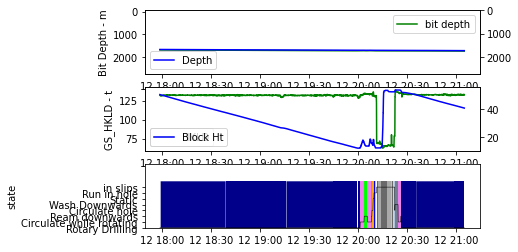

In [136]:
# test again on smllaer range
#note on header
#df[['TIME - s','DMEA - m','DBTM - m','ROP5 - ', 'BPOS - m','HKLD - kkgf','TFLO - L/min','SPPA - kPa','RPM - rpm']]
fig, axs = plt.subplots(3)
#x1= df_depth['TIME - s']
#y1= df_depth['DBTM - m']
#y2 = df_depth['DMEA - m']
range_plot = range(160000,165000,1)#[55000:70000]

x1= df_depth.loc[range_plot,['TIME - s']]
y1= df_depth.loc[range_plot,['GS_DBTM - m']]
y2 = df_depth.loc[range_plot,['GS_DMEA - m']]



#subplot 1
axs[0].plot(x1,y1,'g', label ='bit depth')
#axs[0].plot(x1,y2,'b', label ='Depth')
ax2= axs[0].twinx()
ax2.plot(x1,y2,'b',label='Depth')
#axs[0].plot(x1,y2,'b', label ='depth')

axs[0].set_ylim(2750,-50)
ax2.set_ylim(2750,0)

axs[0].set_ylabel('Bit Depth - m')
axs[0].set_xlabel('date-time')
axs[0].legend(loc=0)
ax2.legend(loc=3)


#subplot 2
#x1= df_depth['TIME - s']
#y1= df_depth['HKLD - kkgf']
#y2 = df_depth['BPOS - m']
x1= df_depth.loc[range_plot,['TIME - s']]
y1= df_depth.loc[range_plot,['GS_HKLD - t']]
y2 = df_depth.loc[range_plot,['GS_BPOS - m']]

axs[1].plot(x1,y1,'g', label ='HKLD')
ax3=axs[1].twinx()
ax3.plot(x1,y2,'b', label ='Block Ht')
#axs[1].set_ylim(1500,-50)
axs[1].set_ylabel('GS_HKLD - t')
axs[1].set_xlabel('date-time')
axs[1].legend(loc=0)
ax3.legend(loc=3)

#cursor = Cursor(ax, useblit = True, color ='red',
               # linewidth = 2)

#set for plot 3
df_depth2 = df_depth.iloc[range_plot,0:]


#subplot 3
#plot time with color for activity
#axs[2].plot(df_depth.loc[range_plot,['TIME - s']].values,df_depth.loc[range_plot,['state_class']].values, color = "black", linewidth = 0.5)
axs[2].plot(df_depth2['TIME - s'],df_depth2['state_class'], color = "black", linewidth = 0.5)
axs[2].set_ylabel("state")
axs[2].set_ylim(0,11)
#axs[2].tick_params(axis='x', colors="black")
axs[2].spines["top"].set_edgecolor("black")

#axs[2].plot(df_depth['TIME - s'],df_depth['state_class'], color = "black", linewidth = 0.5)
#axs[2].set_ylabel("state")
#axs[2].set_ylim(0,1)
##axs[2].tick_params(axis='x', colors="black")
#axs[2].spines["top"].set_edgecolor("black")

for key in state_color.keys():
        color = state_color[key]['color']
        axs[2].fill_between(df_depth2['TIME - s'], 8, 0, where=(df_depth2['state']==key),
                         facecolor=color)



plt.show()

In [77]:
df_depth2[165000:170000]

,TIME - s,GS_DMEA - m,GS_DBTM - m,ROP5 -,GS_BPOS - m,GS_HKLD - t,GS_SWOB - t,GS_TFLO - L/min,GS_SPPA - kPa,GS_RPM - rpm,OBDA,Slips,Pump Status,TDS Status,Pipe Direction,state,state_class


In [66]:
#axs[2].plot(df_depth.loc[range_plot,['TIME - s']],df_depth.loc[range_plot,['state_class']], color = "black", linewidth = 0.5)
#axs[2].plot(df_depth2['TIME - s'],df_depth2['state_class'], color = "black", linewidth = 0.5)

print(df_depth.loc[range_plot,['state_class']])
print(df_depth2['state_class'])

AttributeError: module 'pandas' has no attribute 'df_depth'

In [44]:
ax.plot(df_depth.loc[range_plot,['TIME - s']],df_depth.loc[range_plot,['state_class']], color = "black", linewidth = 0.5)

NameError: name 'ax' is not defined

In [132]:
#save to xls
from openpyxl.utils.dataframe import dataframe_to_rows
rows = dataframe_to_rows(df_depth)

#for r_idx, row in enumerate(rows, 1):
#    for c_idx, value in enumerate(row, 1):
#         ws.cell(row=r_idx, column=c_idx, value=value)

#full_path = os.path.join(directory, filename)
#WITSML_file = r"C:\Users\fmazl\Documents\ibm\volve\test\f15\3\00001.xml"
save_directory = r"C:\Users\fmazl\Documents\ibm\volve\test\f15\csv\f15b - 17.5 in\tagger"
#savepath =  r'C:\Users\fmazl\Documents\ibm\volve\test\f15\csv\3\ '

#df.to_csv(savepath + r'\File Name.csv')
i = 1
#filenum = str(i) + (r'.xlsx')
filenum = str(i) + (r'.csv')
#savepath = savepath + (filenum) + (r'.csv')
savepath = os.path.join(save_directory,filenum)
print(savepath)

#wb.save(savepath + '.xls')
#df_depth.to_excel(savepath + '.xlsx', index=False)
df_depth.to_csv(savepath , index=False)

C:\Users\fmazl\Documents\ibm\volve\test\f15\csv\f15b - 17.5 in\tagger\1.csv


In [ ]:
df_depth

,TIME - s,DMEA - m,DBTM - m,ROP5 -,BPOS - m,HKLD - kkgf,SWOB - kkgf,TFLO - L/min,SPPA - kPa,RPM - rpm,OBDA,Slips,Pump Status,TDS Status,Pipe Direction,state,state_class
0,2019-07-08 14:00:00,618.02,0.05,0.0,29.80,86.08,0.0,0.0,NaN,0.0,0,0,0,0,1,00001,Static
1,2019-07-08 14:00:10,618.02,0.05,0.0,29.80,85.81,0.0,0.0,NaN,0.0,0,0,0,0,1,00001,Static
2,2019-07-08 14:00:20,618.02,0.05,0.0,29.80,86.31,0.0,0.0,NaN,0.0,0,0,0,0,1,00001,Static
3,2019-07-08 14:00:30,618.02,0.05,0.0,29.80,85.99,0.0,0.0,NaN,0.0,0,0,0,0,1,00001,Static
4,2019-07-08 14:00:40,618.02,0.05,0.0,29.80,86.31,0.0,0.0,NaN,0.0,0,0,0,0,1,00001,Static
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30966,2019-11-08 09:14:10,1890.01,0.45,0.0,29.73,85.25,0.0,0.0,NaN,0.0,0,0,0,0,0,00000,Run in hole
30967,2019-11-08 09:14:20,1890.01,0.45,0.0,29.90,84.92,0.0,0.0,NaN,0.0,0,0,0,0,0,00000,Run in hole
30968,2019-11-08 09:14:30,1890.01,0.45,0.0,31.28,80.41,0.0,0.0,NaN,0.0,0,0,0,0,0,00000,Run in hole
30969,2019-11-08 09:14:40,1890.01,0.45,0.0,32.20,84.37,0.0,0.0,NaN,0.0,0,0,0,0,0,00000,Run in hole
